# Lead-Scoring-Case-Study

### Problem Statement :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

### Business Goal :

Build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Steps Followed
- Loading  and reading the data
- Cleaning data
- EDA
- Creating Dummy
- Splitting data into train and test set
- Feature Scaling
- Model Building
- Model Evaluation
- ROC Curve 
- Making Prediction
- Precision- Recall
- Prediction on test set


In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)


## Loading and Cleaning Data

In [4]:
# Loading the data using Pandas
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect the dataframe

In [5]:
# Check the number of rows and columns in the dataframe
df.shape

(9240, 37)

In [6]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Check the summary for the numeric columns 
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Check for the null values
round(100*(df.isnull().sum())/len(df.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values in the data.

In [10]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Since the following columns have only one value "No" in all the rows
# we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

df= df.drop(['Magazine','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Get updates on DM Content',
              'I agree to pay the amount through cheque'],axis=1)

In [12]:
# Check for the null values
round(100*(df.isnull().sum())/len(df.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Following columns have a value called select. 
#Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

df['Specialization'] = df['Specialization'].replace('Select', np.nan)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select', np.nan)
df['Lead Profile'] = df['Lead Profile'].replace('Select', np.nan)
df['City'] = df['City'].replace('Select', np.nan)

In [14]:
# Check for the null values
round(100*(df.isnull().sum())/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
# Removing all the columns that have 35% null values
df.drop(['Specialization','How did you hear about X Education','Tags',
         'Lead Quality','Lead Profile','City','Asymmetrique Activity Index',
         'Asymmetrique Profile Index','Asymmetrique Activity Score',
         'Asymmetrique Profile Score'],axis=1,inplace=True)

In [16]:
# Check for the null values
round(100*(df.isnull().sum())/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Following columns have null values :

- Total Visits
- Page Views Per Visit
- Last Activity 
- Country
- Lead Source
- What is your current occupation
- What matters most to you in choosing a course

Let us see and decide whather we need to impute values in the above column or drop the columns.

In [17]:
# Check the value counts for the column Total Visits

df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [18]:
# Check the median of column 

df['TotalVisits'].median()

3.0

In [19]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

df['TotalVisits'] =df['TotalVisits'].replace(np.nan,df['TotalVisits'].median())

In [20]:
# Check the value counts for Page Views Per Visit

df['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [21]:
# Check the median of the column

df['Page Views Per Visit'].median()

2.0

In [22]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

df['Page Views Per Visit'] =df['Page Views Per Visit'].replace(np.nan,df['Page Views Per Visit'].median())

In [23]:
# Check the value counts for the column Last Activity

df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [24]:
# Since we do not have any information of what the last activity of the customer would have been
#we can add a new category called 'Not Sure' for the null values

df['Last Activity'] =df['Last Activity'].replace(np.nan, 'Not Sure')

In [25]:
# Lets check the value counts for each values in the country column

df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Nigeria                    4
Kuwait                     4
Germany                    4
South Africa               4
Sweden                     3
China                      2
Bangladesh                 2
Belgium                    2
Philippines                2
Ghana                      2
Uganda                     2
Italy                      2
Netherlands                2
Asia/Pacific Region        2
Indonesia                  1
Sri Lanka                  1
Vietnam                    1
Russia                     1
Switzerland                1
Kenya                      1
Malaysia      

In [26]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(df[df['Country'] == 'India'])/len(df['Country']),2)
country_percentage

70.26

In [27]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

df = df.drop(['Country'], axis=1)

In [28]:
# Check the value counts for the column Lead Source

df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
testone                 1
youtubechannel          1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

In [29]:
# From the above it can be noticed that Google appears twice with different cases.
#Hence we shall convert all rows with value "Google" to the same case.
df['Lead Source']=df['Lead Source'].replace('google','Google')

# Also since "Google" has the major chunk of data, we can impute the null values with Google
df['Lead Source']=df['Lead Source'].replace(np.nan,'Google')

In [30]:
# Check the value counts for the column "What is your current Occupation"

df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
# Since no information has been provided Current Occupation
# we can add a new category called No Information  
# and set that as value for the null columns

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'No Information')

In [32]:
# Check the value counts for the column What matters most to you in choosing a course 

df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
matters_most_percentage = round(100*len(df[df['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(df['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [34]:
# Since Better Career Prospects occurs around 70% of times in the What matters 
# most to you in choosing a course column
# since the column also has around 29% as missing values
# we shall go ahead and drop the column

df= df.drop(['What matters most to you in choosing a course'], axis=1)

In [35]:
# check for percentage of null values in each column

round(100*(df.isnull().sum()/len(df)), 2)


Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data concentrated towards one value

In [36]:
df.shape

(9240, 20)

### Outlier Treatment

In [37]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

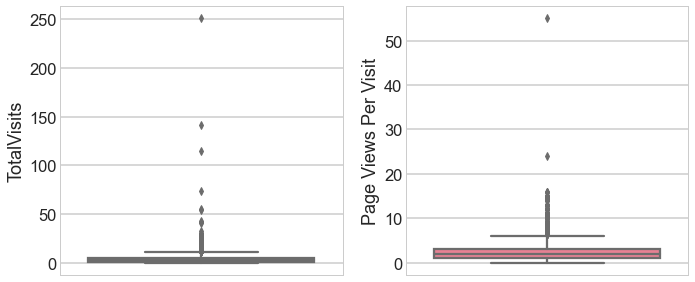

In [38]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(10,4))
sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

plt.subplot(1,2,1)
sns.boxplot(y = 'TotalVisits', palette='husl', data = df)

plt.subplot(1,2,2)
sns.boxplot(y = 'Page Views Per Visit', palette='husl', data = df)

plt.tight_layout()
plt.subplots_adjust(top=1)
plt.show()

In [39]:
#outlier treatment for TotalVisits
Q1 = df.TotalVisits.quantile(0.05)
Q3 = df.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.TotalVisits >= Q1 - 1.5*IQR) & (df.TotalVisits <= Q3 + 1.5*IQR)]

#outlier treatment for Page Views Per Visit
Q1 = df['Page Views Per Visit'].quantile(0.05)
Q3 = df['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]


In [40]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/9240),2)
print(num_data)

99.72


At this point, the data has been cleaned and around 99.5% of data has been retained

### Data Analysis

Let us try and understand the data now based on each columns effect on the conversion rates

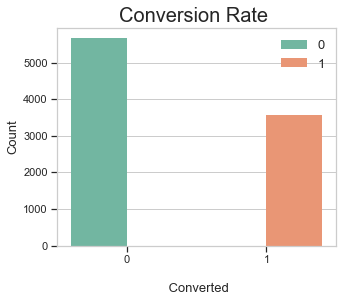

In [41]:
# Conversion Rate 
plt.figure(figsize=[5,4])
sns.set_context('notebook')

sns.countplot(data=df, x=df['Converted'],palette="Set2",hue = 'Converted')
plt.title('Conversion Rate ',fontsize=20)
plt.xlabel('\n Converted',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=0)
plt.show()

From the above graph, there has been a overall **conversion rate** of around **38%**

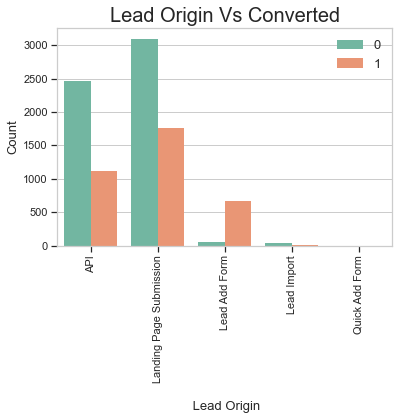

In [42]:
# Lead Origin
plt.figure(figsize=[6,4])
sns.set_context('notebook')

sns.countplot(data=df, x=df['Lead Origin'],hue = "Converted",palette="Set2")
plt.title('Lead Origin Vs Converted',fontsize=20)
plt.xlabel('\n Lead Origin',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)


plt.xticks(rotation=90)
plt.show()

**Inference**
- Maximum conversion happened from **Landing Page Submission** and **API** but count of lead originated from them are considerable.
- **Lead Add Form** has more than 90% conversion rate but count of lead are not very high.

To improve overall lead conversion rate, we need to `focus more on improving lead converion of API and Landing Page Submission origin`. We can `generate more leads from Lead Add Form`.



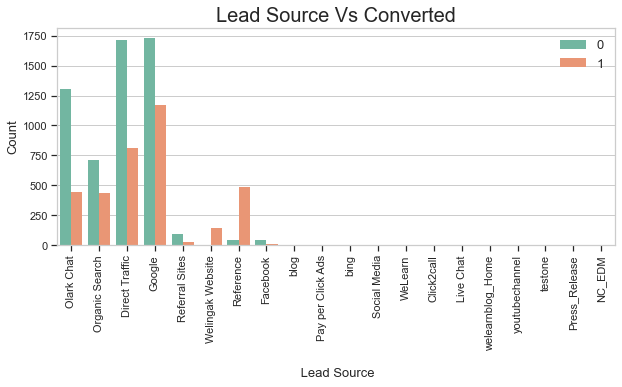

In [43]:
# Lead Source
plt.figure(figsize=[10,4])
sns.set_context('notebook')

sns.countplot(data=df, x=df['Lead Source'],hue = "Converted",palette="Set2")
plt.title('Lead Source Vs Converted',fontsize=20)
plt.xlabel('\n Lead Source',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)


plt.xticks(rotation=90)
plt.show()

**Inference**
- Major conversion in the lead source is from **Google** and **Direct Traffic**
- Conversion Rate of **Reference** leads and leads through **Welingak Website** is high.

To `improve` overall lead conversion rate, `focus` should be on improving lead converion of `Olark Chat, Organic Search, Direct Traffic, and Google leads`. We can `generate more` leads from `Reference and Welingak Website`.

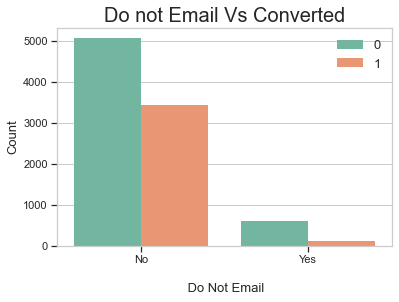

In [44]:
# Do not Email
plt.figure(figsize=[6,4])
sns.set_context('notebook')

sns.countplot(data=df, x=df['Do Not Email'],hue = "Converted",palette="Set2")
plt.title('Do not Email Vs Converted',fontsize=20)
plt.xlabel('\n Do Not Email',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)


plt.xticks(rotation=0)
plt.show()

Based on the above graph, `major conversion has happend from the Emails` that have been sent

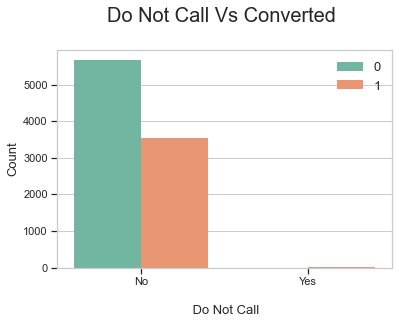

In [45]:
# Do Not Call
plt.figure(figsize=[6,4])
sns.set_context('notebook')

sns.countplot(data=df, x=df['Do Not Call'],hue = "Converted",palette="Set2")
plt.title('Do Not Call Vs Converted \n ',fontsize=20)
plt.xlabel('\n Do Not Call',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)


plt.xticks(rotation=0)
plt.show()

From the above graph , it can be noticed that `major conversions happened when calls were made`
.However, it can also be seen that `few leads opted for "Do Not Call", but they still got converted`.

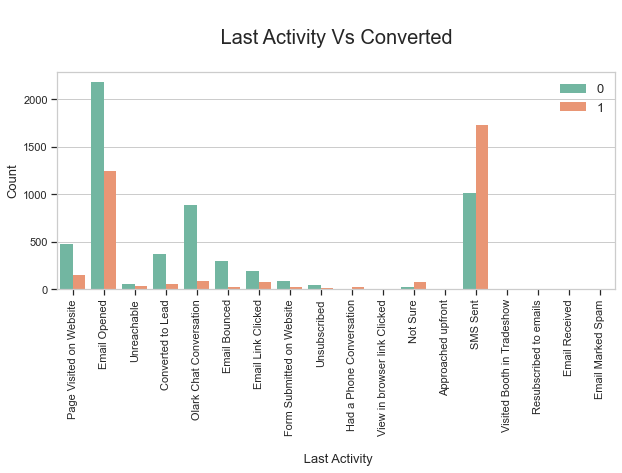

In [46]:
# Last Activity
plt.figure(figsize=[10,4])
sns.set_context('notebook')

sns.countplot(data=df, x=df['Last Activity'],hue = "Converted",palette="Set2")
plt.title('\n Last Activity Vs Converted \n ',fontsize=20)
plt.xlabel('\n Last Activity',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)


plt.xticks(rotation=90)
plt.show()

As per the above graph, last activity value of `'SMS Sent' had more conversion`

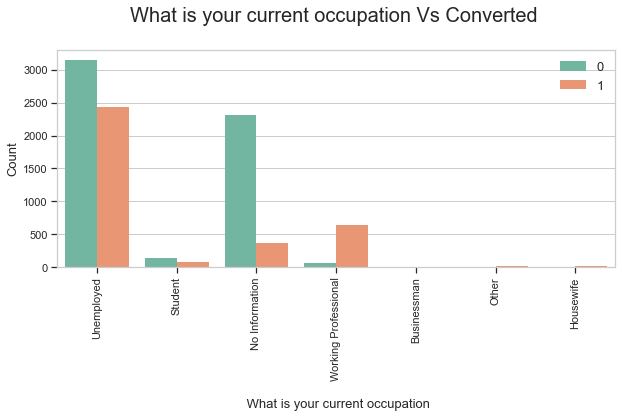

In [47]:
# What is your current occupation
plt.figure(figsize=[10,4])
sns.set_context('notebook')

plot=sns.countplot(data=df, x=df['What is your current occupation'],hue = "Converted",palette="Set2")

plt.title('What is your current occupation Vs Converted \n ',fontsize=20)
plt.xlabel('\n What is your current occupation',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=90)
plt.show()

Inference
- More conversion happend with people who are **unemployed**.
- **Working Professionals** has high conversion rate though their count is low.
- **Housewife** has also shown good converion rate.

To `improve` overall lead conversion rate, `focus` should be on `unemployed`. We can `generate more` leads from `Working Professionals and Housewife`.

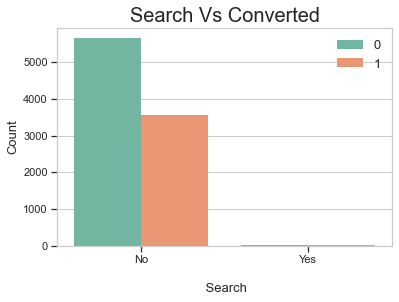

In [48]:
# Search
plt.figure(figsize=[6,4])
sns.set_context('notebook')

plot=sns.countplot(data=df, x=df['Search'],hue = "Converted",palette="Set2")

plt.title('Search Vs Converted',fontsize=20)
plt.xlabel('\n Search',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=0)
plt.show()

In [49]:
df['Search'].describe()

count     9214
unique       2
top         No
freq      9200
Name: Search, dtype: object

Most entries are 'No', No Inference can be drawn with this parameter though as per the graph conversion rate is high on leads who has not gone through search. 

Hence its better to drop this column.

In [50]:
df=df.drop(['Search'],axis=1)

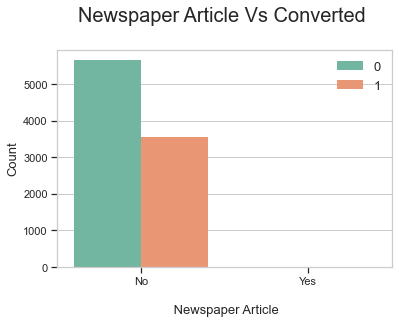

In [51]:
# Newspaper Article
plt.figure(figsize=[6,4])
sns.set_context('notebook')

plot=sns.countplot(data=df, x=df['Newspaper Article'],hue = "Converted",palette="Set2")

plt.title('Newspaper Article Vs Converted \n ',fontsize=20)
plt.xlabel('\n Newspaper Article',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=0)
plt.show()

In [52]:
df['Newspaper Article'].describe()

count     9214
unique       2
top         No
freq      9212
Name: Newspaper Article, dtype: object

Most entries are 'No', No Inference can be drawn with this parameter though as per the graph conversion rate is high on leads who have not gone through Newspaper Article.

Hence its better to drop this column.

In [53]:
df=df.drop(['Newspaper Article'],axis=1)

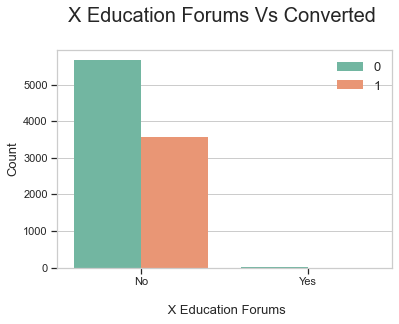

In [54]:
# X Education Forums
plt.figure(figsize=[6,4])
sns.set_context('notebook')

plot=sns.countplot(data=df, x=df['X Education Forums'],hue = "Converted",palette="Set2")

plt.title('X Education Forums Vs Converted \n ',fontsize=20)
plt.xlabel('\n X Education Forums',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=0)
plt.show()

In [55]:
df['X Education Forums'].describe()

count     9214
unique       2
top         No
freq      9213
Name: X Education Forums, dtype: object

Most entries are 'No', No Inference can be drawn with this parameter though as per the graph conversion rate is high on leads who are not through X Education Forums.

Hence its better to drop this column.

In [56]:
df=df.drop(['X Education Forums'],axis=1)

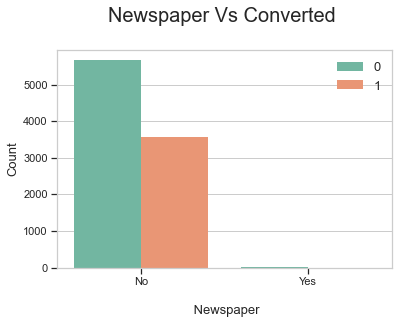

In [57]:
# Newspaper
plt.figure(figsize=[6,4])
sns.set_context('notebook')

plot=sns.countplot(data=df, x=df['Newspaper'],hue = "Converted",palette="Set2")

plt.title('Newspaper Vs Converted \n ',fontsize=20)
plt.xlabel('\n Newspaper',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=0)
plt.show()

In [58]:
df['Newspaper'].describe()

count     9214
unique       2
top         No
freq      9213
Name: Newspaper, dtype: object

Most entries are 'No', No Inference can be drawn with this parameter though as per the graph conversion rate is high on leads who are not through Newspaper.

Hence its better to drop this column.

In [59]:
df=df.drop(['Newspaper'],axis=1)

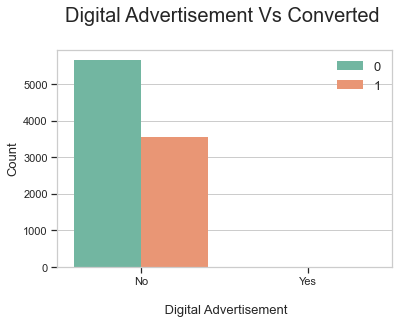

In [60]:
# Digital Advertisement
plt.figure(figsize=[6,4])
sns.set_context('notebook')

plot=sns.countplot(data=df, x=df['Digital Advertisement'],hue = "Converted",palette="Set2")

plt.title('Digital Advertisement Vs Converted \n ',fontsize=20)
plt.xlabel('\n Digital Advertisement',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=0)
plt.show()

In [61]:
df['Digital Advertisement'].describe()

count     9214
unique       2
top         No
freq      9210
Name: Digital Advertisement, dtype: object

Most entries are 'No', No Inference can be drawn with this parameter though as per the graph conversion rate is high on leads who are not through Digital Advertisement.

Hence its better to drop this column.

In [62]:
df=df.drop(['Digital Advertisement'],axis=1)

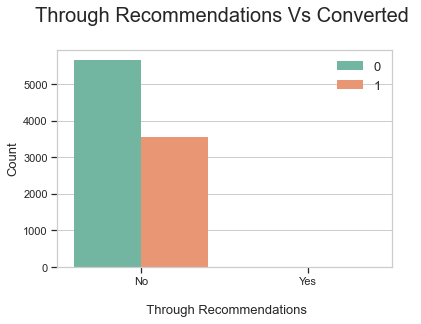

In [63]:
# Through Recommendations
plt.figure(figsize=[6,4])
sns.set_context('notebook')

plot=sns.countplot(data=df, x=df['Through Recommendations'],hue = "Converted",palette="Set2")

plt.title('Through Recommendations Vs Converted \n ',fontsize=20)
plt.xlabel('\n Through Recommendations',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=0)
plt.show()

In [64]:
df['Through Recommendations'].describe()

count     9214
unique       2
top         No
freq      9207
Name: Through Recommendations, dtype: object

Most entries are 'No', No Inference can be drawn with this parameter though as per graph conversion rate is high on leads who are not Through Recommendations.

Hence its better to drop this column.

In [65]:
df=df.drop(['Through Recommendations'],axis=1)

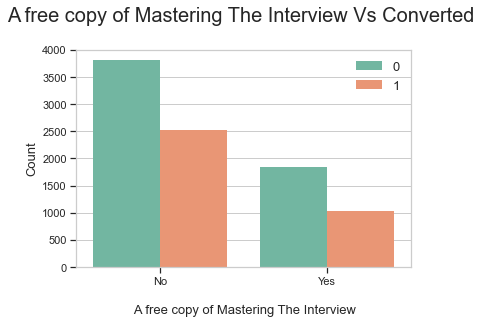

In [66]:
# A free copy of Mastering The Interview
plt.figure(figsize=[6,4])
sns.set_context('notebook')

plot=sns.countplot(data=df, x=df['A free copy of Mastering The Interview'],hue = "Converted",palette="Set2")

plt.title('A free copy of Mastering The Interview Vs Converted \n ',fontsize=20)
plt.xlabel('\n A free copy of Mastering The Interview',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=0)
plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

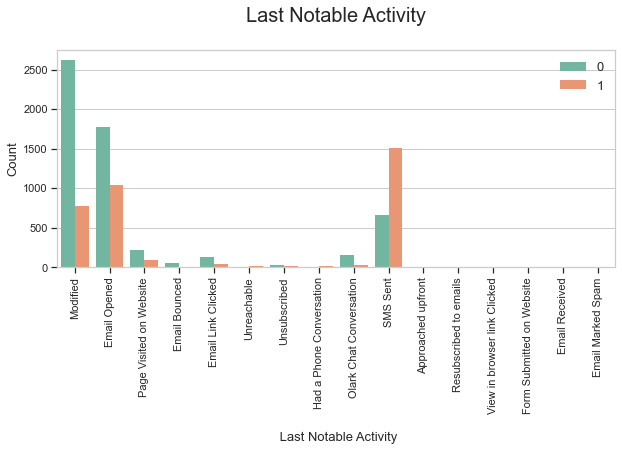

In [67]:
# Last Notable Activity
plt.figure(figsize=[10,4])
sns.set_context('notebook')

plot=sns.countplot(data=df, x=df['Last Notable Activity'],hue = "Converted",palette="Set2")

plt.title('Last Notable Activity\n ',fontsize=20)
plt.xlabel('\n Last Notable Activity',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.legend(loc='upper right',fontsize=13)

plt.xticks(rotation=90)
plt.show()

It can be noticed that the conversion rate is high for` SMS Sent, Email opened and Modified`.

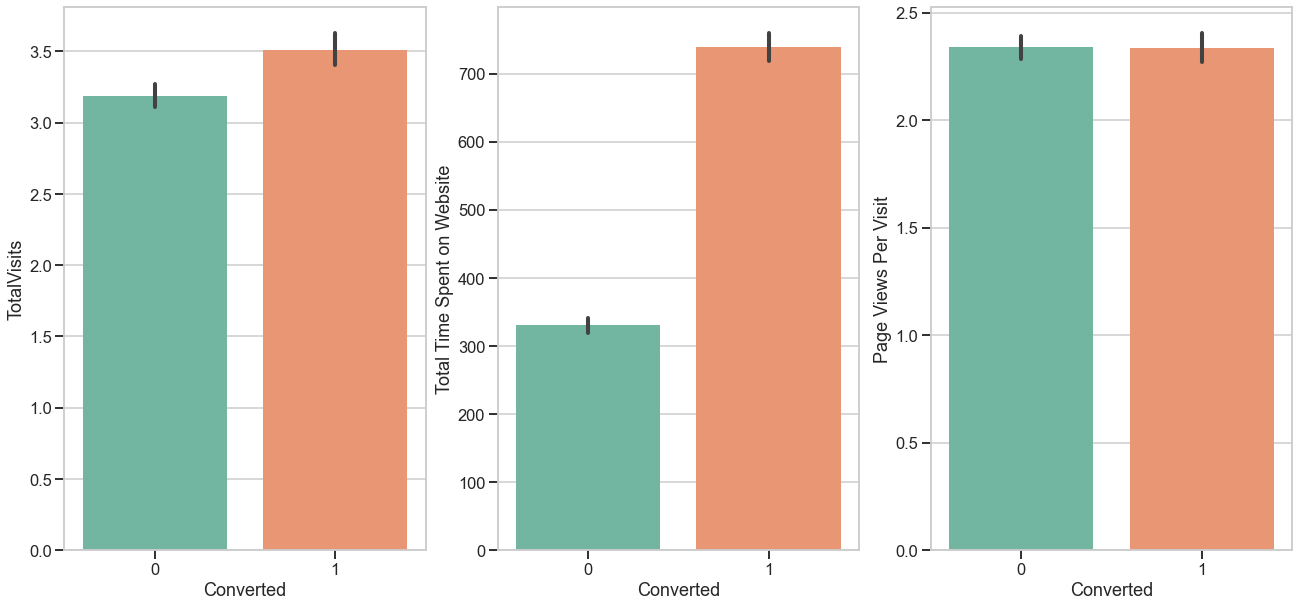

In [68]:
# Now check the conversions for all numeric values
plt.figure(figsize=(22,10))
sns.set_context('talk')

plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = df)
plt.subplot(1,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = df)
plt.subplot(1,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = df)
plt.show()

The conversion rated were `high for Total Visits, Total Time Spent on Website and Page Views Per Visit`.

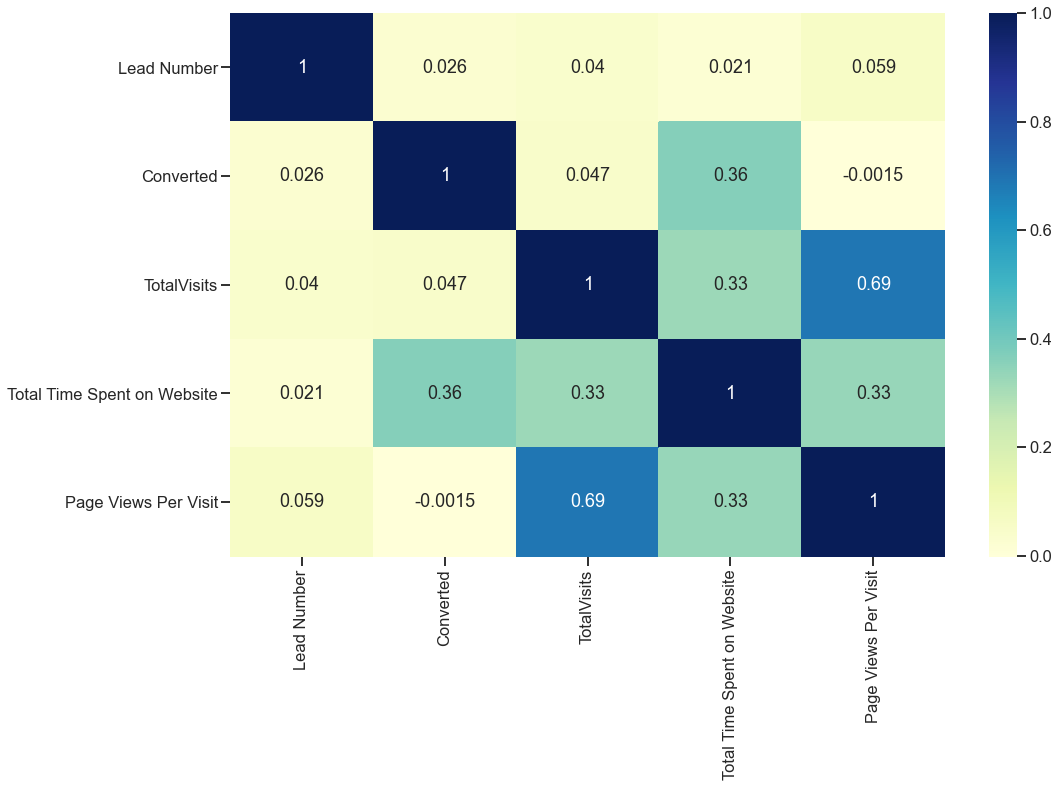

In [69]:
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [70]:
df.shape

(9214, 14)

In [71]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


## Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [72]:
# List of variables to map
varlist =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [73]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [74]:
df.shape


(9214, 14)

In [75]:
# Creating a dummy variable for some of the categorical variables
# and dropping the first one.

dummy1=pd.get_dummies(df[['Lead Origin', 'Lead Source','Last Activity',
                          'What is your current occupation','Last Notable Activity']],
                           drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
# We have created dummies for the below variables,so we can drop following columns 

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

df = df.drop(['Prospect ID','Lead Number','Lead Origin','Lead Source','Last Activity',
              'What is your current occupation', 'Last Notable Activity'], axis=1)
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [77]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Do Not Email                                            0.0
Do Not Call                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
A free copy of Mastering The Interview                  0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Origin_Quick Add Form                              0.0
Lead Source_Direct Traffic                              0.0
Lead Source_Facebook                                    0.0
Lead Source_Google                                      0.0
Lead Source_Live Chat                                   0.0
Lead Source_NC_EDM                                      0.0
Lead Source_Olark Chat                  

In [78]:
# check shape of the data frame

df.shape

(9214, 68)

## Test-Train Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# Putting feature variable to X

X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [81]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [82]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

## Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5967,0,0,0.201446,-0.468210,-0.179632,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1792,0,0,1.415868,0.388745,2.753733,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3991,0,0,-0.405764,-0.873848,-0.668527,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1172,0,0,-0.405764,0.008688,-0.179632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1624,0,0,-1.012975,-0.888466,-1.157421,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [85]:
### Checking the Conversion Rate percentage

converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

38.571738658563056

We have almost 39% conversion rate

## Model Building

Assessing the model with StatsModels

Running the Initial Training Model

In [86]:
import statsmodels.api as sm

In [87]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6390
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.8
Date:                Mon, 17 May 2021   Deviance:                       5123.6
Time:                        21:16:16   Pearson chi2:                 6.50e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   45.5694   1.12e+05      0.000      1.000    -2.2e+05     2.2e+05
Do Not Email                                            -1.3499      0.221     -6.117      0.000      -1.782      -0.917
Do Not Call                                             22.9440   5.36e+04      0.000      1.000   -1.05e+05    1.05e+05
TotalVisits                                              0.2914      0.050      5.788      0.000       0.193       0.390
Total Time Spent on Website                              1.0635      0.041     26.193      0.000       0.984       1.143
Page Views Per Visit                                    -0.1624      0.055     -2.959      0.003      -0.270      -0.055
A free copy of Mastering The Interview                  -0.0639      0.109     -0.587      0.557      -0.277       0.150
Lead Origin_Landing Page Submission                     -0.2175      0.110     -1.978      0.048      -0.433      -0.002
Lead Origin_Lead Add Form                                3.1879      0.607      5.255      0.000       1.999       4.377
Lead Origin_Lead Import                                -21.7662   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Quick Add Form                              23.3773   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                             -22.4350   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                     0.0331   1.12e+05   2.94e-07      1.000    -2.2e+05     2.2e+05
Lead Source_Google                                     -22.1781   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Live Chat                                  5.11e-09   1.72e-05      0.000      1.000   -3.37e-05    3.37e-05
Lead Source_NC_EDM                                       2.2397   1.12e+05   1.99e-05      1.000    -2.2e+05     2.2e+05
Lead Source_Olark Chat                                 -21.0833   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Organic Search                             -22.3374   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Pay per Click Ads                          -43.9969   1.12e+05     -0.000      1.000    -2.2e+05     2.2e+05
Lead Source_Press_Release                              -42.7539   9.68e+04     -0.000      1.000    -1.9e+05     1.9e+05
Lead Source_Reference                                  -21.9470   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Referral Sites                             -22.2005   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Social Media                             -9.95

## Feature Selection Using RFE

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [89]:
from sklearn.feature_selection import RFE
# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True, False,
       False, False, False, False])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Origin_Quick Add Form', False, 17),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_NC_EDM', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', False, 30),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 45),
 ('Lead Source_WeLearn', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 

In [92]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Not Sure',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_No Information',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [93]:
X_train.columns[~rfe.support_]


Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on W

### Rebuilding Model - Model 2

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.5
Date:                Mon, 17 May 2021   Deviance:                       5227.0
Time:                        21:16:26   Pearson chi2:                 6.69e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5391      0.562      2.737      0.006       0.437       2.641
Do Not Email                                            -1.4329      0.195     -7.349      0.000      -1.815      -1.051
Total Time Spent on Website                              1.0800      0.040     27.012      0.000       1.002       1.158
Lead Origin_Lead Add Form                                3.6364      0.209     17.361      0.000       3.226       4.047
Lead Source_Olark Chat                                   1.2841      0.105     12.252      0.000       1.079       1.489
Lead Source_Welingak Website                             2.0128      0.746      2.698      0.007       0.551       3.475
Last Activity_Converted to Lead                         -1.0433      0.221     -4.721      0.000      -1.476      -0.610
Last Activity_Email Bounced                             -1.2450      0.367     -3.390      0.001      -1.965      -0.525
Last Activity_Not Sure                                  -1.3791      0.485     -2.843      0.004      -2.330      -0.428
Last Activity_Olark Chat Conversation                   -1.3609      0.197     -6.897      0.000      -1.748      -0.974
What is your current occupation_Housewife               22.3468   2.46e+04      0.001      0.999   -4.81e+04    4.82e+04
What is your current occupation_No Information          -2.3167      0.562     -4.120      0.000      -3.419      -1.215
What is your current occupation_Student                 -1.0842      0.596     -1.818      0.069      -2.253       0.084
What is your current occupation_Unemployed              -1.2326      0.559     -2.206      0.027      -2.328      -0.138
What is your current occupation_Working Professional     1.3250      0.587      2.256      0.024       0.174       2.476
Last Notable Activity_Email Link Clicked                -1.9028      0.276     -6.903      0.000      -2.443      -1.363
Last Notable Activity_Email Opened                      -1.3236      0.088    -14.992      0.000      -1.497      -1.151
Last Notable Activity_Had a Phone Conversation          23.1132   2.64e+04      0.001      0.999   -5.16e+04    5.17e+04
Last Notable Activity_Modified                          -1.4699      0.100    -14.672      0.000      -1.666      -1.274
Last Notable Activity_Olark Chat Conversation           -1.2920      0.392     -3.292      0.001      -2.061      -0.523
Last Notable Activity_Page Visited on Website           -1.6318      0.204     -7.994      0.000      -2.032      -1.232
========================================================================================================================
"""

Removing column "What is your current occupation_Housewife" as it has a high pvalue and hence is insignificant

In [95]:
col = col.drop('What is your current occupation_Housewife',1)

### Rebuilding Model - Model 3

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.3
Date:                Mon, 17 May 2021   Deviance:                       5230.5
Time:                        21:16:26   Pearson chi2:                 6.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9221      0.529      3.636      0.000       0.886       2.958
Do Not Email                                            -1.4356      0.195     -7.355      0.000      -1.818      -1.053
Total Time Spent on Website                              1.0789      0.040     27.002      0.000       1.001       1.157
Lead Origin_Lead Add Form                                3.6405      0.209     17.389      0.000       3.230       4.051
Lead Source_Olark Chat                                   1.2821      0.105     12.235      0.000       1.077       1.487
Lead Source_Welingak Website                             2.0073      0.746      2.691      0.007       0.545       3.469
Last Activity_Converted to Lead                         -1.0422      0.221     -4.717      0.000      -1.475      -0.609
Last Activity_Email Bounced                             -1.2420      0.367     -3.381      0.001      -1.962      -0.522
Last Activity_Not Sure                                  -1.3710      0.484     -2.832      0.005      -2.320      -0.422
Last Activity_Olark Chat Conversation                   -1.3652      0.198     -6.910      0.000      -1.752      -0.978
What is your current occupation_No Information          -2.6985      0.529     -5.102      0.000      -3.735      -1.662
What is your current occupation_Student                 -1.4669      0.564     -2.599      0.009      -2.573      -0.360
What is your current occupation_Unemployed              -1.6152      0.525     -3.078      0.002      -2.644      -0.587
What is your current occupation_Working Professional     0.9423      0.555      1.698      0.090      -0.146       2.030
Last Notable Activity_Email Link Clicked                -1.8986      0.275     -6.905      0.000      -2.437      -1.360
Last Notable Activity_Email Opened                      -1.3229      0.088    -14.988      0.000      -1.496      -1.150
Last Notable Activity_Had a Phone Conversation          22.1126    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
Last Notable Activity_Modified                          -1.4707      0.100    -14.682      0.000      -1.667      -1.274
Last Notable Activity_Olark Chat Conversation           -1.2867      0.392     -3.278      0.001      -2.056      -0.517
Last Notable Activity_Page Visited on Website           -1.6313      0.204     -7.993      0.000      -2.031      -1.231
========================================================================================================================
"""

Removing column 'Last Notable Activity_Had a Phone Conversation' as it has a high pvalue and hence is insignificant

In [97]:

col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

### Rebuilding Model - Model 4

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.0
Date:                Mon, 17 May 2021   Deviance:                       5237.9
Time:                        21:16:26   Pearson chi2:                 6.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9341      0.528      3.660      0.000       0.898       2.970
Do Not Email                                            -1.4434      0.195     -7.397      0.000      -1.826      -1.061
Total Time Spent on Website                              1.0766      0.040     26.971      0.000       0.998       1.155
Lead Origin_Lead Add Form                                3.6347      0.209     17.361      0.000       3.224       4.045
Lead Source_Olark Chat                                   1.2760      0.105     12.181      0.000       1.071       1.481
Lead Source_Welingak Website                             2.0076      0.746      2.691      0.007       0.545       3.470
Last Activity_Converted to Lead                         -1.0431      0.221     -4.723      0.000      -1.476      -0.610
Last Activity_Email Bounced                             -1.2394      0.367     -3.375      0.001      -1.959      -0.520
Last Activity_Not Sure                                  -1.3678      0.484     -2.827      0.005      -2.316      -0.420
Last Activity_Olark Chat Conversation                   -1.3637      0.198     -6.903      0.000      -1.751      -0.976
What is your current occupation_No Information          -2.7004      0.529     -5.108      0.000      -3.737      -1.664
What is your current occupation_Student                 -1.4678      0.564     -2.601      0.009      -2.574      -0.362
What is your current occupation_Unemployed              -1.6141      0.525     -3.077      0.002      -2.642      -0.586
What is your current occupation_Working Professional     0.9407      0.555      1.695      0.090      -0.147       2.028
Last Notable Activity_Email Link Clicked                -1.9084      0.275     -6.942      0.000      -2.447      -1.370
Last Notable Activity_Email Opened                      -1.3334      0.088    -15.122      0.000      -1.506      -1.161
Last Notable Activity_Modified                          -1.4808      0.100    -14.794      0.000      -1.677      -1.285
Last Notable Activity_Olark Chat Conversation           -1.2955      0.392     -3.301      0.001      -2.065      -0.526
Last Notable Activity_Page Visited on Website           -1.6411      0.204     -8.044      0.000      -2.041      -1.241
========================================================================================================================
"""

Removing column 'What is your current occupation_Working Professional' as it has high pvalue and hence is insignificant

In [99]:
col = col.drop('What is your current occupation_Working Professional',1)

### Rebuilding Model - Model 5

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.3
Date:                Mon, 17 May 2021   Deviance:                       5240.6
Time:                        21:16:26   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              2.7884      0.186     15.012      0.000       2.424       3.152
Do Not Email                                      -1.4454      0.195     -7.403      0.000      -1.828      -1.063
Total Time Spent on Website                        1.0759      0.040     26.959      0.000       0.998       1.154
Lead Origin_Lead Add Form                          3.6339      0.209     17.359      0.000       3.224       4.044
Lead Source_Olark Chat                             1.2758      0.105     12.181      0.000       1.070       1.481
Lead Source_Welingak Website                       2.0085      0.746      2.692      0.007       0.546       3.471
Last Activity_Converted to Lead                   -1.0333      0.220     -4.692      0.000      -1.465      -0.602
Last Activity_Email Bounced                       -1.2277      0.366     -3.350      0.001      -1.946      -0.509
Last Activity_Not Sure                            -1.3654      0.484     -2.822      0.005      -2.314      -0.417
Last Activity_Olark Chat Conversation             -1.3695      0.198     -6.917      0.000      -1.758      -0.981
What is your current occupation_No Information    -3.5519      0.192    -18.490      0.000      -3.928      -3.175
What is your current occupation_Student           -2.3193      0.275     -8.424      0.000      -2.859      -1.780
What is your current occupation_Unemployed        -2.4661      0.179    -13.745      0.000      -2.818      -2.114
Last Notable Activity_Email Link Clicked          -1.9069      0.275     -6.944      0.000      -2.445      -1.369
Last Notable Activity_Email Opened                -1.3368      0.088    -15.174      0.000      -1.509      -1.164
Last Notable Activity_Modified                    -1.4850      0.100    -14.843      0.000      -1.681      -1.289
Last Notable Activity_Olark Chat Conversation     -1.2917      0.393     -3.290      0.001      -2.061      -0.522
Last Notable Activity_Page Visited on Website     -1.6405      0.204     -8.053      0.000      -2.040      -1.241
==================================================================================================================
"""

Since the Model 5 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [101]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5967    0.068880
1792    0.322017
3991    0.336496
1172    0.036528
1624    0.035634
4811    0.376622
7358    0.081318
952     0.671698
8675    0.008525
1328    0.144251
dtype: float64

In [102]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06887951, 0.32201675, 0.33649599, 0.03652849, 0.03563405,
       0.37662157, 0.08131808, 0.67169774, 0.00852522, 0.14425123])

**Creating a dataframe with the actual converted flag and the predicted probabilities**

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.068880,5967
1,0,0.322017,1792
2,0,0.336496,3991
3,0,0.036528,1172
4,0,0.035634,1624


**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.068880,5967,0
1,0,0.322017,1792,0
2,0,0.336496,3991,0
3,0,0.036528,1172,0
4,0,0.035634,1624,0


**Lets check the confusion metrics and accuracy**

In [105]:
from sklearn import metrics

In [106]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3538  443]
 [ 738 1730]]


In [107]:
# Predicted     not_converted    converted
# Actual
# not_converted        3538      443
# converted            738       1730

In [108]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8168708326872384


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,3.03
11,What is your current occupation_Unemployed,2.76
9,What is your current occupation_No Information,2.33
13,Last Notable Activity_Email Opened,2.09
8,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.85
6,Last Activity_Email Bounced,1.78
3,Lead Source_Olark Chat,1.76
2,Lead Origin_Lead Add Form,1.52
15,Last Notable Activity_Olark Chat Conversation,1.37


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

**Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value**

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7009724473257699

In [112]:
# Let us calculate specificity

TN / float(TN+FP)

0.8887214267771917

In [113]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11127857322280833


In [114]:
# positive predictive value 

print (TP / float(TP+FP))

0.796134376438104


In [115]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8274087932647334


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

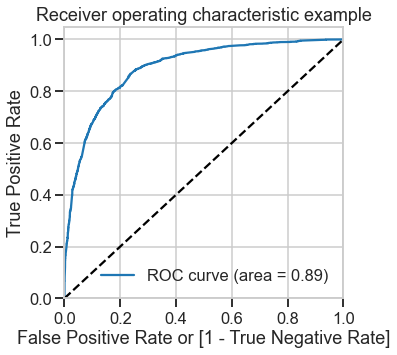

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.068880,5967,0,1,0,0,0,0,0,0,0,0,0
1,0,0.322017,1792,0,1,1,1,1,0,0,0,0,0,0
2,0,0.336496,3991,0,1,1,1,1,0,0,0,0,0,0
3,0,0.036528,1172,0,1,0,0,0,0,0,0,0,0,0
4,0,0.035634,1624,0,1,0,0,0,0,0,0,0,0,0
5,0,0.376622,4811,0,1,1,1,1,0,0,0,0,0,0
6,0,0.081318,7358,0,1,0,0,0,0,0,0,0,0,0
7,0,0.671698,952,1,1,1,1,1,1,1,1,0,0,0
8,0,0.008525,8675,0,1,0,0,0,0,0,0,0,0,0
9,0,0.144251,1328,0,1,1,0,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382695  1.000000  0.000000
0.1   0.1  0.623663  0.974878  0.405928
0.2   0.2  0.765390  0.912480  0.674202
0.3   0.3  0.799504  0.878039  0.750816
0.4   0.4  0.811909  0.774311  0.835217
0.5   0.5  0.816871  0.700972  0.888721
0.6   0.6  0.807722  0.629254  0.918362
0.7   0.7  0.782757  0.514992  0.948757
0.8   0.8  0.762289  0.432739  0.966591
0.9   0.9  0.711738  0.269449  0.985933


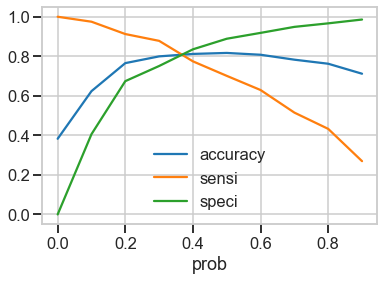

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [122]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.068880,5967,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.322017,1792,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.336496,3991,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.036528,1172,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.035634,1624,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.068880,5967,0,1,0,0,0,0,0,0,0,0,0,0,7
1,0,0.322017,1792,0,1,1,1,1,0,0,0,0,0,0,0,32
2,0,0.336496,3991,0,1,1,1,1,0,0,0,0,0,0,0,34
3,0,0.036528,1172,0,1,0,0,0,0,0,0,0,0,0,0,4
4,0,0.035634,1624,0,1,0,0,0,0,0,0,0,0,0,0,4
5,0,0.376622,4811,0,1,1,1,1,0,0,0,0,0,0,1,38
6,0,0.081318,7358,0,1,0,0,0,0,0,0,0,0,0,0,8
7,0,0.671698,952,1,1,1,1,1,1,1,1,0,0,0,1,67
8,0,0.008525,8675,0,1,0,0,0,0,0,0,0,0,0,0,1
9,0,0.144251,1328,0,1,1,0,0,0,0,0,0,0,0,0,14


In [124]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1990
0     478
Name: final_predicted, dtype: int64

In [125]:
# check the precentage of final_predicted conversions

1990/float(1965+497)

0.8082859463850528

Hence we can see that the final prediction of conversions have a target of 81%(80.8%)  conversion as per the X Educations CEO's requirement . Hence this is a good model.

Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [126]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.811288571871608

In [127]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3242,  739],
       [ 478, 1990]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8063209076175041

In [130]:
# Let us calculate specificity

TN / float(TN+FP)

0.8143682491836222

In [131]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.18563175081637778


In [132]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7292048369366069


In [133]:
# Negative predictive value

print (TN / float(TN+ FN))

0.871505376344086


**Metrics - Precision and Recall**

In [134]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3538,  443],
       [ 738, 1730]], dtype=int64)

In [135]:
from sklearn.metrics import precision_score, recall_score

In [136]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.796134376438104

In [137]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7009724473257699


**Precision and recall tradeoff**

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6444    0
 6445    1
 6446    0
 6447    1
 6448    0
 Name: Converted, Length: 6449, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6444    0
 6445    1
 6446    0
 6447    1
 6448    0
 Name: predicted, Length: 6449, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

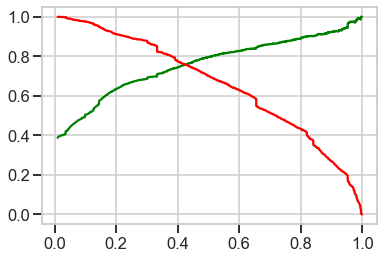

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [142]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [143]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,What is your current occupation_No Information,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
2108,0,1.033746,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
6101,0,1.062982,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6539,0,-0.217884,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
8446,1,-0.713055,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5065,0,-0.484655,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [144]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [145]:
y_test_pred = res.predict(X_test_sm)

In [146]:
y_test_pred[:10]

2108    0.524389
6101    0.812430
6539    0.080879
8446    0.131208
5065    0.156542
3501    0.725289
2651    0.975203
6448    0.246396
3266    0.350704
2090    0.867798
dtype: float64

In [147]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head

y_pred_1.head()

,0
2108,0.524389
6101,0.812430
6539,0.080879
8446,0.131208
5065,0.156542


In [149]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [150]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [151]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [152]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [153]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2108,0.524389
1,1,6101,0.812430
2,0,6539,0.080879
3,0,8446,0.131208
4,0,5065,0.156542


In [154]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [155]:
# Rearranging the columns
y_pred_final = y_pred_final[['LeadId','Converted','Converted_Prob']]

In [156]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,2108,1,0.524389
1,6101,1,0.812430
2,6539,0,0.080879
3,8446,0,0.131208
4,5065,0,0.156542


In [157]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [158]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,2108,1,0.524389,1
1,6101,1,0.812430,1
2,6539,0,0.080879,0
3,8446,0,0.131208,0
4,5065,0,0.156542,0


In [159]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,2108,1,0.524389,1,52
1,6101,1,0.812430,1,81
2,6539,0,0.080879,0,8
3,8446,0,0.131208,0,13
4,5065,0,0.156542,0,16
5,3501,0,0.725289,1,73
6,2651,1,0.975203,1,98
7,6448,0,0.246396,0,25
8,3266,1,0.350704,0,35
9,2090,1,0.867798,1,87


In [160]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    864
0    222
Name: final_predicted, dtype: int64

In [161]:
# check the precentage of final_predicted conversions on test data

864/float(864+222)

0.7955801104972375

Hence we can see that the final prediction of conversions have a target rate of 80% (79.55%) (Around 1 % short of the predictions made on training data set)



Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [162]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8180831826401447

In [163]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1398,  281],
       [ 222,  864]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7955801104972375

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.8326384752829065

Precision and Recall metrics for the test set

In [167]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.754585152838428
recall  0.7955801104972375


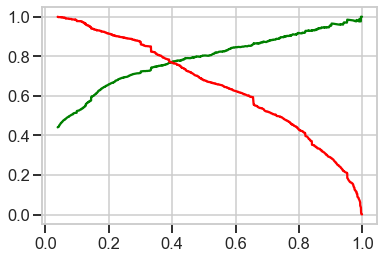

In [168]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Conclusion :**

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 82%, 80% and 83% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
- Hence overall this model seems to be good.   

These are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion

- From Lead Origin- Lead Add Form
- From Lead Source- Welingak Website
- From Lead Source- Olark Chat



Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.